# World Happiness Report #
source: https://www.kaggle.com/datasets/unsdsn/world-happiness/code
##### Group Number: 9 #####
##### Names:  Kehan LIU | Nam NGUYEN LE | Nour ABBOUD | Ramisa HEIDARI | Sastélvio MANUEL
### Context ###
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

The orginal dataset has the following columns:

*   GDP per Capita
*   Family
*   Life Expectancy
*   Freedom
*   Generosity
*   Trust Government

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


from collections import Counter
import warnings

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Let's start by reading the whole datasets

In [2]:
data_2015=pd.read_csv('2015.csv')
data_2016=pd.read_csv('2016.csv')
data_2017=pd.read_csv('2017.csv')
data_2018=pd.read_csv('2018.csv')
data_2019=pd.read_csv('happiness_2019.csv')

### We will explore every dataset and  start by making some changes on each data to make them more suitable for the data integration part

We will:
    
    1. Drop unwanted columns like the Hapiness Rank, Standard Error, Lower Confidence Interval, Dystopia Residual and more
    features because they're useless to our analysis.
    
    2. Add a year column to be used in the data integration part in order differentiate between each dataset we have
    
    3. Rename some columns in each dataset.
    
    

#### We will start by the World Hapiness dataset of 2015

In [3]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
# Calculate the percentage of missing values for each column
missing_percentage_2015 = (data_2015.isnull().sum() / len(data_2015)) * 100

# Display the percentage of missing values
print(missing_percentage_2015)

Country                          0.0
Region                           0.0
Happiness Rank                   0.0
Happiness Score                  0.0
Standard Error                   0.0
Economy (GDP per Capita)         0.0
Family                           0.0
Health (Life Expectancy)         0.0
Freedom                          0.0
Trust (Government Corruption)    0.0
Generosity                       0.0
Dystopia Residual                0.0
dtype: float64


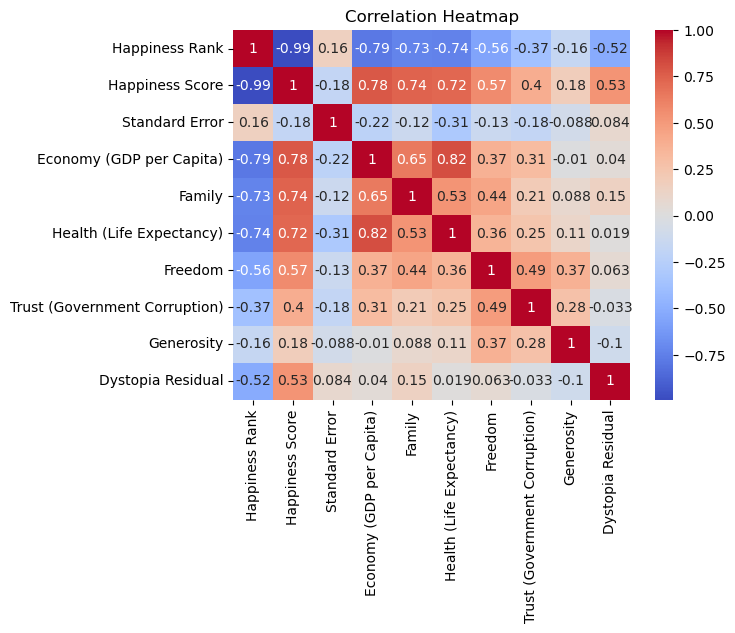

In [6]:
#the correlation matrix
correlation_matrix_2015 = data_2015.corr(numeric_only=True)
sns.heatmap(correlation_matrix_2015, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
#Drop unwanted columns
#For example the Hapiness Rank because it's highly correlated with the Hapiness Score
data_2015 = data_2015.drop( columns= ['Happiness Rank','Standard Error','Dystopia Residual'])

# Add Year Column

data_2015["Year"] = 2015

#Rename Columns
data_2015_col = ['Country', 'Region', 'Happiness Score','GDP per Capita', 'Family','Life Expectancy', 'Freedom',
                'Trust','Generosity',"Year"]

data_2015.columns = data_2015_col

data_2015.head()

,Country,Region,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Trust,Generosity,Year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


#### It's the turn of the 2016 dataset

In [8]:
data_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [9]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [10]:
#Drop unwanted columns
data_2016 = data_2016.drop( columns= ['Happiness Rank','Dystopia Residual','Lower Confidence Interval'
                                    , 'Upper Confidence Interval'])

#Add Year Column

data_2016["Year"] = 2016

#Ramame Columns
data_2016_col = ['Country', 'Region', 'Happiness Score','GDP per Capita', 'Family',
                'Life Expectancy', 'Freedom','Trust','Generosity',"Year"]

data_2016.columns = data_2016_col

data_2016.head()

,Country,Region,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Trust,Generosity,Year
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


#### It's the turn of the 2017 dataset

In [11]:
data_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [12]:
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [13]:
#Drop unwanted columns

data_2017 = data_2017.drop( columns= ['Happiness.Rank','Dystopia.Residual','Whisker.high','Whisker.low'])

#Add Year & Region Column
data_2017['Region'] = pd.Series([], dtype=object)
data_2017['Region'] = data_2017['Country'].map(dict(zip(data_2015['Country'],data_2015['Region']))).fillna(data_2017.Region)

data_2017["Year"] = 2017

#Ramame Columns
data_2017_col = ['Country','Happiness Score','GDP per Capita','Family','Life Expectancy', 'Freedom',
                'Generosity','Trust',"Region",'Year']

data_2017.columns = data_2017_col

data_2017.head()

,Country,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Trust,Region,Year
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,Western Europe,2017
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,Western Europe,2017
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,Western Europe,2017
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,Western Europe,2017
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,Western Europe,2017


#### It's the turn of the 2018 dataset

In [14]:
data_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [15]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [16]:
#Drop unwanted columns

data_2018 = data_2018.drop(columns= ['Overall rank'])

#Add Year & Region Column

#Add Year & Region Column
data_2018['Region'] = pd.Series([], dtype=object)
data_2018['Region'] = data_2018['Country or region'].map(dict(zip(data_2015['Country'],data_2015['Region']))).fillna(data_2018.Region)

data_2018["Year"] = 2018

#Ramame Columns
data_2018_col = ['Country', 'Happiness Score', 'GDP per Capita','Family', 'Life Expectancy','Freedom',
                'Generosity','Trust',"Region",'Year']

data_2018.columns = data_2018_col

data_2018.head()

,Country,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Trust,Region,Year
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe,2018
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe,2018
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Western Europe,2018
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,Western Europe,2018
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,Western Europe,2018


#### It's the turn of the 2019 dataset

In [17]:
data_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [18]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [19]:
#Drop unwanted columns
data_2019 = data_2019.drop(columns= ['Overall rank'])

#Add Year & Region Column

#Add Year & Region Column
data_2019['Region'] = pd.Series([], dtype=object)
data_2019['Region'] = data_2019['Country or region'].map(dict(zip(data_2015['Country'],data_2015['Region']))).fillna(data_2019.Region)


data_2019["Year"] = 2019

#Ramame Columns
data_2019_col = ['Country', 'Happiness Score', 'GDP per Capita','Family', 'Life Expectancy','Freedom',
                'Generosity','Trust',"Region",'Year']

data_2019.columns = data_2019_col

data_2019.head()

,Country,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Trust,Region,Year
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe,2019
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,2019
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe,2019
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe,2019
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe,2019


In [20]:
#Re-ORDER the columns in dataset
order = ['Country', 'Region', 'Happiness Score','GDP per Capita', 'Family','Life Expectancy', 'Freedom',
                'Trust','Generosity',"Year"]

data_2015 = data_2015.reindex(columns=order)
data_2016 = data_2016.reindex(columns=order)
data_2017 = data_2017.reindex(columns=order)
data_2018 = data_2018.reindex(columns=order)
data_2019 = data_2019.reindex(columns=order)

### Data Integration Part

Now after exploring each dataset, we will concatenate all of them so we will end up by one main dataset.

In [21]:
#concatinate the data frames

data = pd.concat([data_2015,data_2016,data_2017,data_2018,data_2019])

data

,Country,Region,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Trust,Generosity,Year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,Sub-Saharan Africa,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
152,Tanzania,Sub-Saharan Africa,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
153,Afghanistan,Southern Asia,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
154,Central African Republic,Sub-Saharan Africa,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


In [22]:
# The five number summary (Min,Max,IQR,Std,Mean)
data.describe()

,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Trust,Generosity,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,782.000000
mean,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576,2016.993606
std,1.127456,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321,1.417364
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.509750,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000,2016.000000
50%,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982,2017.000000
75%,6.189500,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832,2018.000000
max,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,2019.000000


In [23]:
#Search for unique value under 'Country' column

country_column = data["Country"]

print (country_column.unique())

['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'Portugal' 'Latvia'
 'Philip

In [24]:
# Replace 'Macedonia' with 'N.Macedonia' in the 'Country' column
data.loc[data['Country'] == 'Macedonia', 'Country'] = 'N.Macedonia'

# Replace 'North Macedonia' with 'N.Macedonia' in the 'Country' column
data.loc[data['Country'] == 'North Macedonia', 'Country'] = 'N.Macedonia'

# Replace 'Northern Cyprus' and 'North Cyprus' with 'N.Cyprus' in the 'Country' column
data.loc[data['Country'].isin(['Northern Cyprus', 'North Cyprus']), 'Country'] = 'N.Cyprus'

# Replace 'Hong Kong S.A.R., China' with 'Hong Kong' in the 'Country' column
data.loc[data['Country'] == 'Hong Kong S.A.R., China', 'Country'] = 'Hong Kong'

# Replace 'Taiwan Province of China' with 'Taiwan' in the 'Country' column
data.loc[data['Country'] == 'Taiwan Province of China', 'Country'] = 'Taiwan'

# Replace 'Trinidad & Tobago' with 'Trinidad and Tobago' in the 'Country' column
data.loc[data['Country'] == 'Trinidad & Tobago', 'Country'] = 'Trinidad and Tobago'

# Replace 'Somaliland region' with 'Somaliland Region' in the 'Country' column
data.loc[data['Country'] == 'Somaliland region', 'Country'] = 'Somaliland Region'

In [25]:
#sort the main dataset

data = data.sort_values('Country')

#reset index

data = data.reset_index(drop=True)

In [26]:
data

,Country,Region,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Trust,Generosity,Year
0,Afghanistan,Southern Asia,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2016
1,Afghanistan,Southern Asia,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,2015
2,Afghanistan,Southern Asia,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,2018
3,Afghanistan,Southern Asia,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,2019
4,Afghanistan,Southern Asia,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2017
...,...,...,...,...,...,...,...,...,...,...
777,Zimbabwe,Sub-Saharan Africa,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,2018
778,Zimbabwe,Sub-Saharan Africa,3.663,0.366000,1.114000,0.433000,0.361000,0.089000,0.151000,2019
779,Zimbabwe,Sub-Saharan Africa,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2015
780,Zimbabwe,Sub-Saharan Africa,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2016


In [27]:
data.isna().sum()

Country             0
Region             19
Happiness Score     0
GDP per Capita      0
Family              0
Life Expectancy     0
Freedom             0
Trust               1
Generosity          0
Year                0
dtype: int64

In [28]:
#Replace missing value of the 'Government Corruption' with mean of the column
data['Trust'] = data['Trust'].transform(lambda x: x.fillna(x.mean()))

In [29]:
grouped = data.groupby('Country')

In [30]:
#front fill missing values

data['Region'] = grouped['Region'].ffill( )

#Back fill missing values

data['Region'] = grouped['Region'].bfill( )

In [31]:
data.isna().sum()

Country            0
Region             1
Happiness Score    0
GDP per Capita     0
Family             0
Life Expectancy    0
Freedom            0
Trust              0
Generosity         0
Year               0
dtype: int64

In [32]:
#Check index
missing = data['Region'].isna()
indices = data[missing].index
print(indices)

Index([235], dtype='int64')


In [33]:
print(data.loc[235])

Country            Gambia
Region                NaN
Happiness Score     4.516
GDP per Capita      0.308
Family              0.939
Life Expectancy     0.428
Freedom             0.382
Trust               0.167
Generosity          0.269
Year                 2019
Name: 235, dtype: object


In [34]:
#Replace missing Value
data.fillna('Sub-Saharan Africa', inplace=True)

In [35]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Display the percentage of missing values
print(missing_percentage)

Country            0.0
Region             0.0
Happiness Score    0.0
GDP per Capita     0.0
Family             0.0
Life Expectancy    0.0
Freedom            0.0
Trust              0.0
Generosity         0.0
Year               0.0
dtype: float64


### Exploratory data analysis (EDA)

In [36]:
def plot_corr(corr):
    # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap)

#### 1. Distribution of Happiness Score

C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


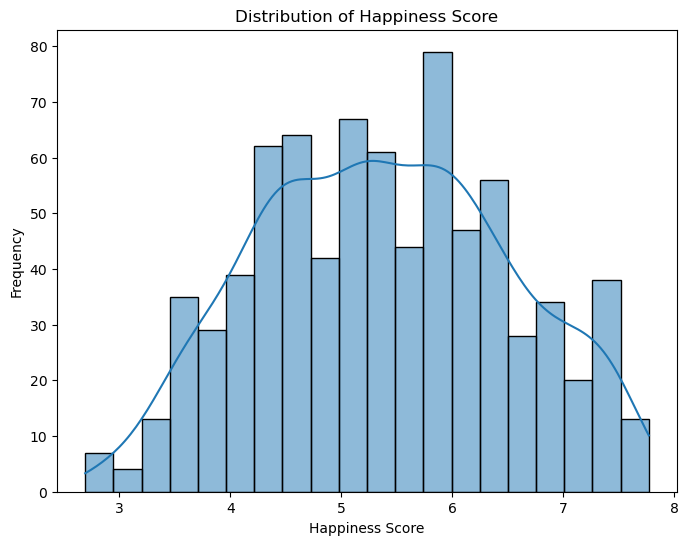

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Happiness Score'], bins=20, kde=True)
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Score')
plt.show()

#### We can notice that the Distribution of the happiness score is near to the normal distribution.

#### 2. Regional Analysis

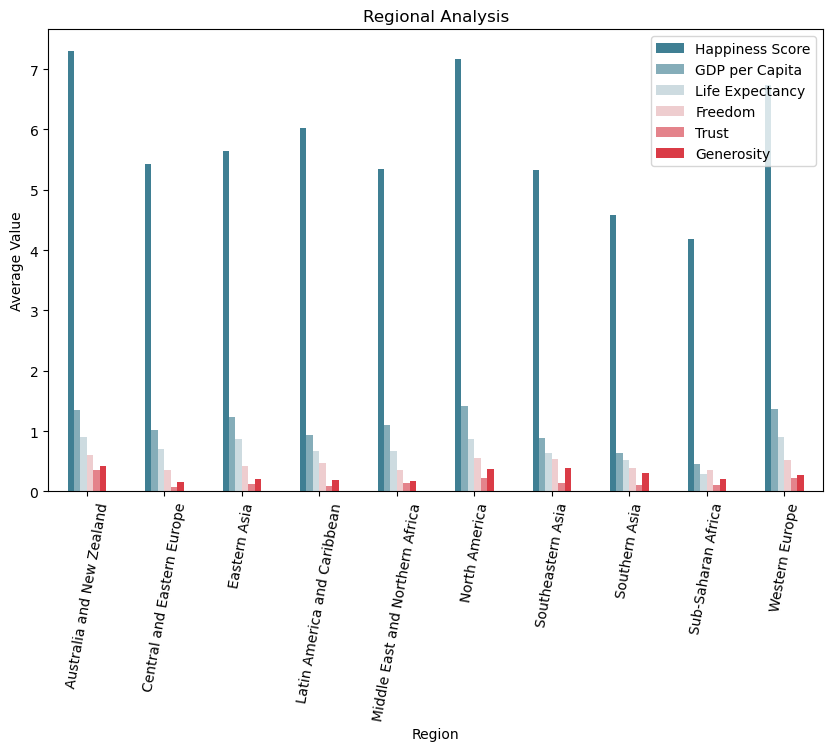

In [38]:
region_avg = data.groupby('Region')[['Happiness Score', 'GDP per Capita', 'Life Expectancy','Freedom','Trust','Generosity']].mean()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
region_avg.plot(kind='bar', figsize=(10, 6), cmap=cmap)
plt.ylabel('Average Value')
plt.title('Regional Analysis')
plt.xticks(rotation=80)
plt.show()

####  we can notice several information from this plot:
1. Eastern Asia is the happiest region in Asia
2. Sub-Saharan Africa has Freedom greater than the life Expectancy
3. Central and Eastern Europe have the lowest Trust for the Government

#### 3.Time Trends

C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

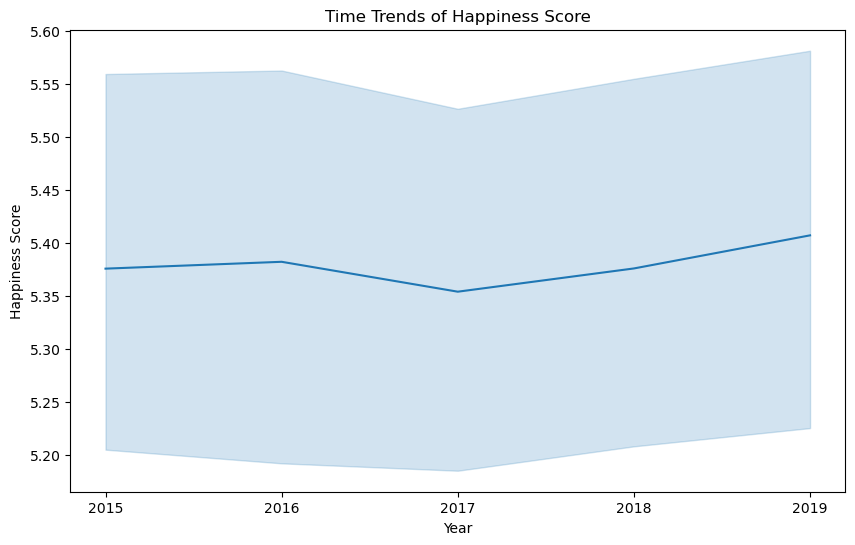

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Happiness Score', data=data)
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Time Trends of Happiness Score')
# Set integer XTicks
plt.locator_params(axis='x', integer=True)
plt.show()

#### We can notice from this lineplot that almost every region in the world tend to have similar variations in their Happiness Score.

#### 4. Correlation heatmap

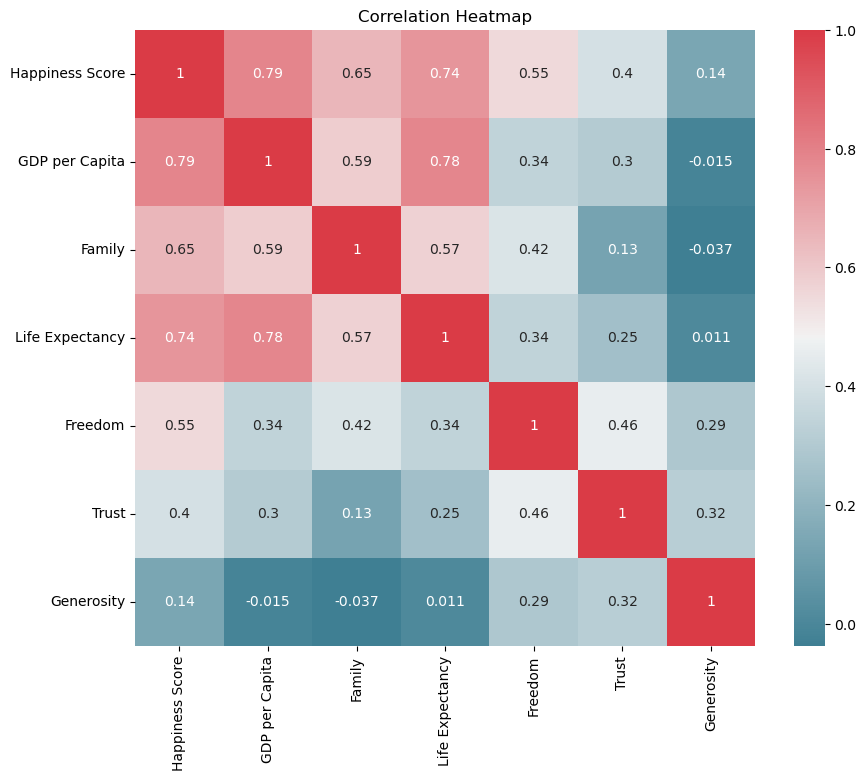

In [40]:
# Create a new DataFrame excluding the specified column
data_without_column = data.drop('Year', axis=1)

# Calculate the correlation matrix for the remaining numeric columns
correlation_matrix = data_without_column.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
# Generate a custom diverging colormap
sns.heatmap(correlation_matrix, annot=True, cmap=cmap)
plt.title('Correlation Heatmap')
plt.show()

#### From the correlation matrix, we can notice that the GDP per capita, Family and the Life Expectancy are strongly correlated with the Happiness Score variable.
We can say that countries that have high GDP per capita, have the high services and their citizens tends to make a family are the happiest countries.

#### 5. Outlier Detection

C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

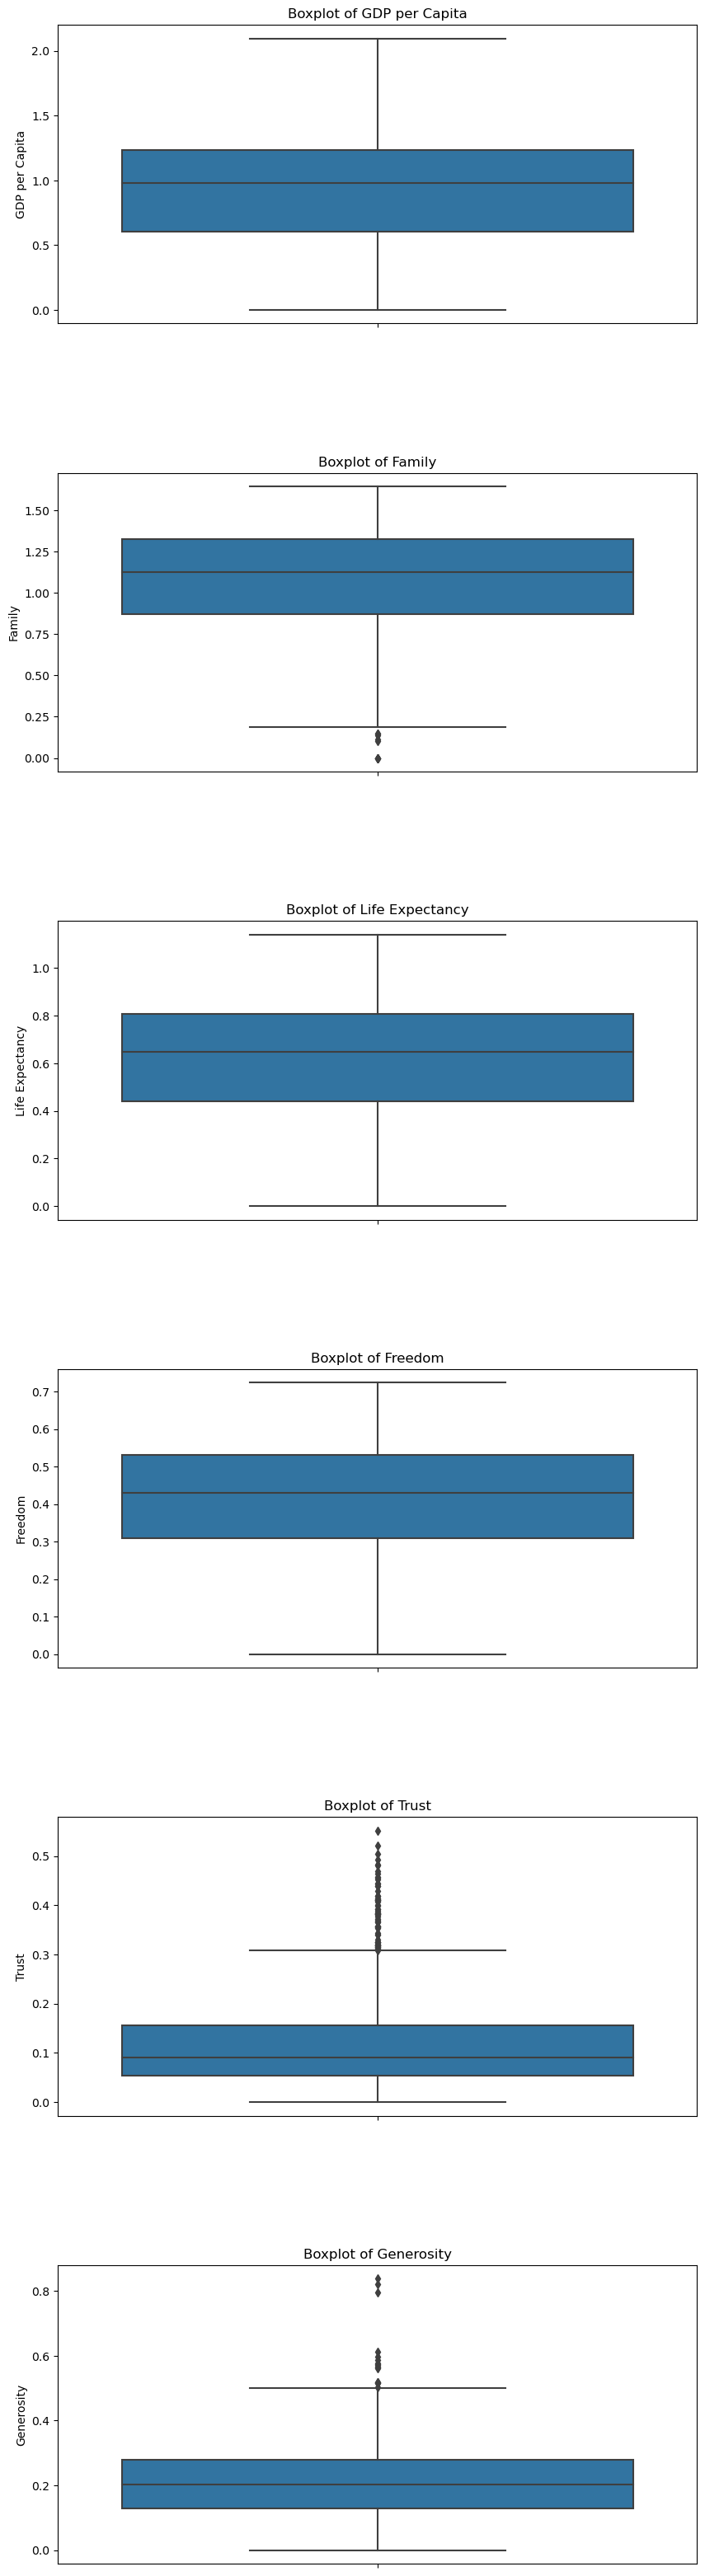

In [41]:
# Select numerical columns for outlier detection
numerical_columns = [ 'GDP per Capita', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity']

# Create subplots for boxplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 40))
plt.subplots_adjust(hspace=0.5)

# Iterate through each numerical feature
for i, column in enumerate(numerical_columns):
    # Create a boxplot for the feature
    sns.boxplot(data=data, y=column, ax=axes[i])

    # Customize the subplot
    axes[i].set_ylabel(column)
    axes[i].set_title(f'Boxplot of {column}')

# Display the boxplots
plt.show()

#### We can notice that we have outliers in 2 variables Generosity and Trust, but in our case we will keep them because our datasets are for countries and maybe those countries will be a cluster in the end.

#### 6. Top and Bottom Countries

C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


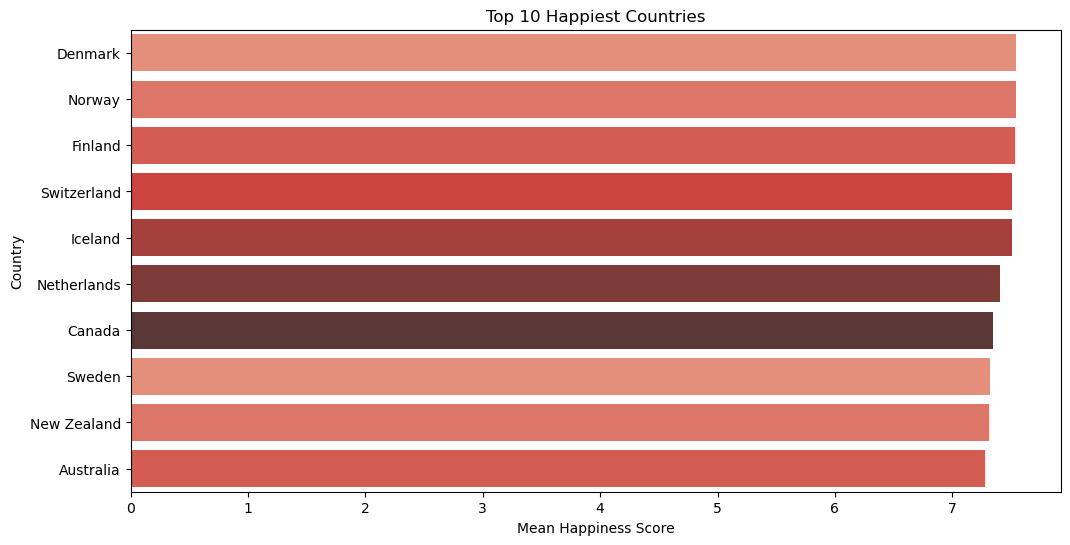

In [42]:
countries_happiness = data.groupby('Country')['Happiness Score'].mean().reset_index()
countries_happiness = countries_happiness.sort_values(by='Happiness Score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Happiness Score', y='Country', data=countries_happiness[:10],palette=sns.color_palette("Reds_d", n_colors=7, desat=1))
plt.xlabel('Mean Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 Happiest Countries')
plt.show()

C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


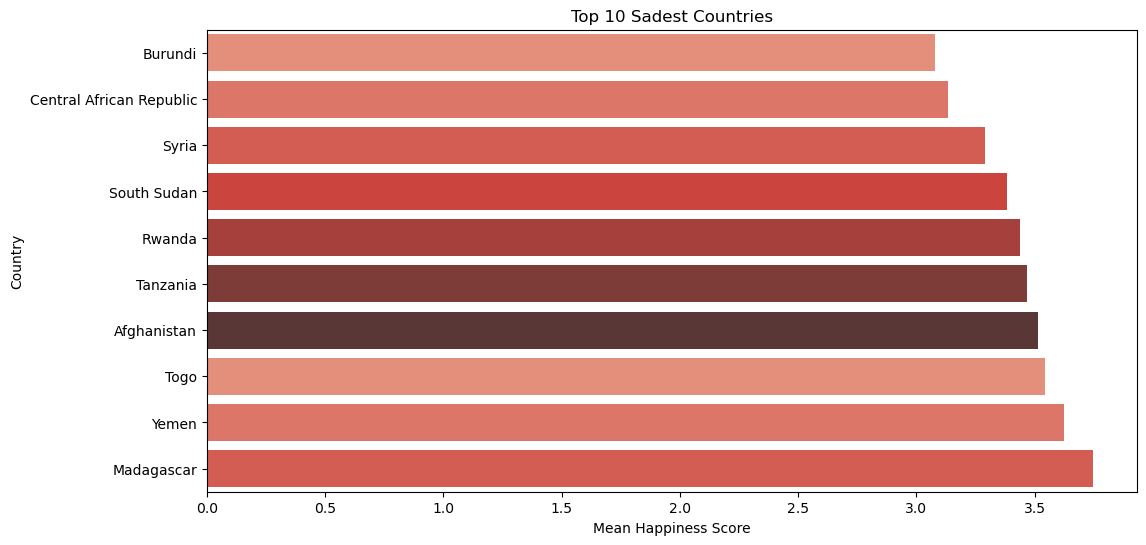

In [43]:
countries_sadness = data.groupby('Country')['Happiness Score'].mean().reset_index()
countries_sadness = countries_sadness.sort_values(by='Happiness Score', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Happiness Score', y='Country', data=countries_sadness[:10],palette=sns.color_palette("Reds_d", n_colors=7, desat=1))
plt.xlabel('Mean Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 Sadest Countries')
plt.show()

#### 7. Region-specific Analysis (e.g., for a specific region like 'Europe')

In [44]:
europe_data = data[(data['Region'] == 'Central and Eastern Europe') | (data['Region'] == 'Western Europe')]

In [45]:
asia_data = data[(data['Region'] == 'Southern Asia') | (data['Region'] == 'Southeastern Asia') | (data['Region'] == 'Eastern Asia')]

In [46]:
Africa_data = data[(data['Region'] == 'Middle East and Northern Africa') | (data['Region'] == 'Sub-Saharan Africa')]

C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

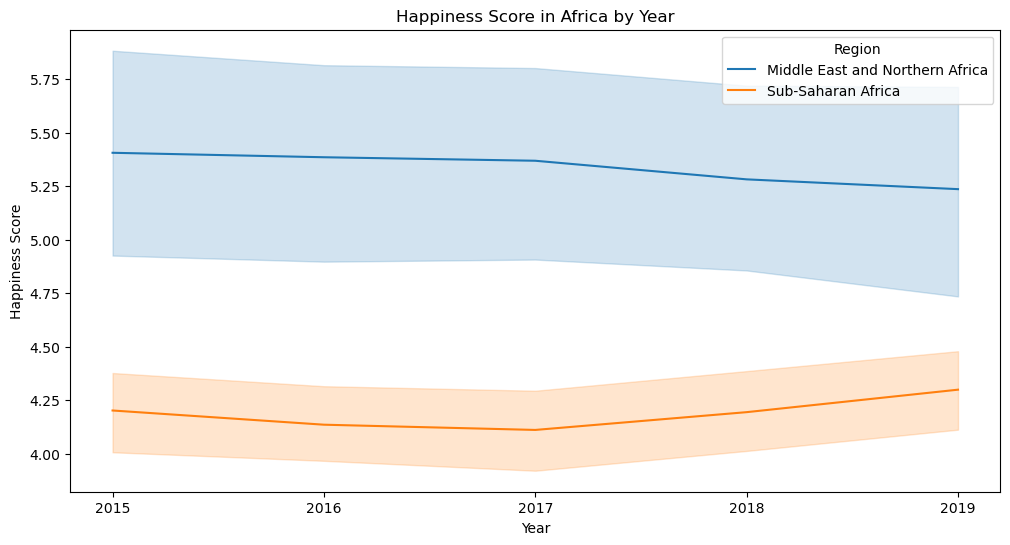

In [47]:
# Create a line plot of hapiness score per Capita by year
plt.figure(figsize=(12, 6))
sns.lineplot(data=Africa_data, x='Year', y='Happiness Score', hue='Region')
# Set integer XTicks
plt.locator_params(axis='x', integer=True)

plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Happiness Score in Africa by Year')
plt.legend(title='Region')
plt.show()

C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

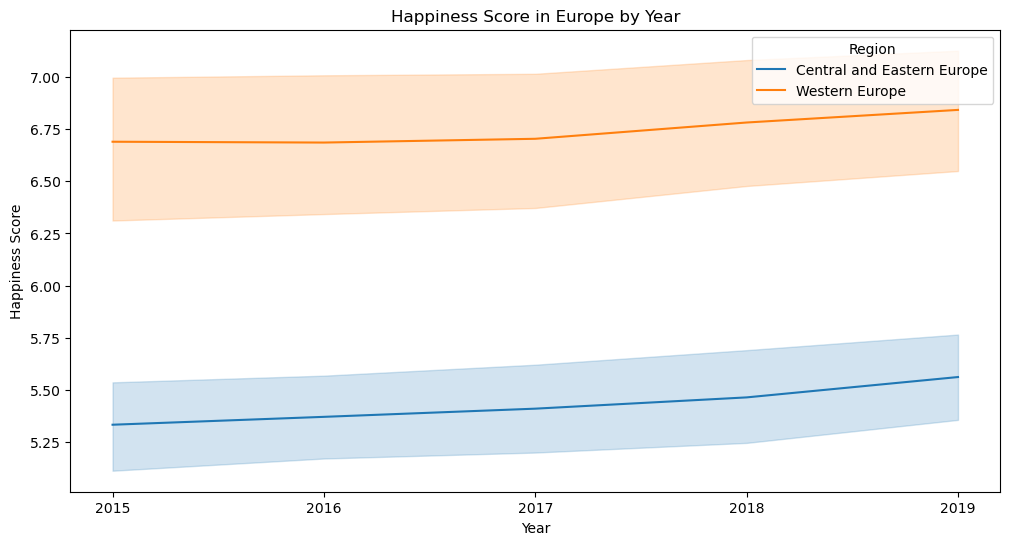

In [48]:
# Create a line plot of GDP per Capita per Capita by year
plt.figure(figsize=(12, 6))
sns.lineplot(data=europe_data, x='Year', y='Happiness Score', hue='Region')
# Set integer XTicks
plt.locator_params(axis='x', integer=True)

plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Happiness Score in Europe by Year')
plt.legend(title='Region')
plt.show()

C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

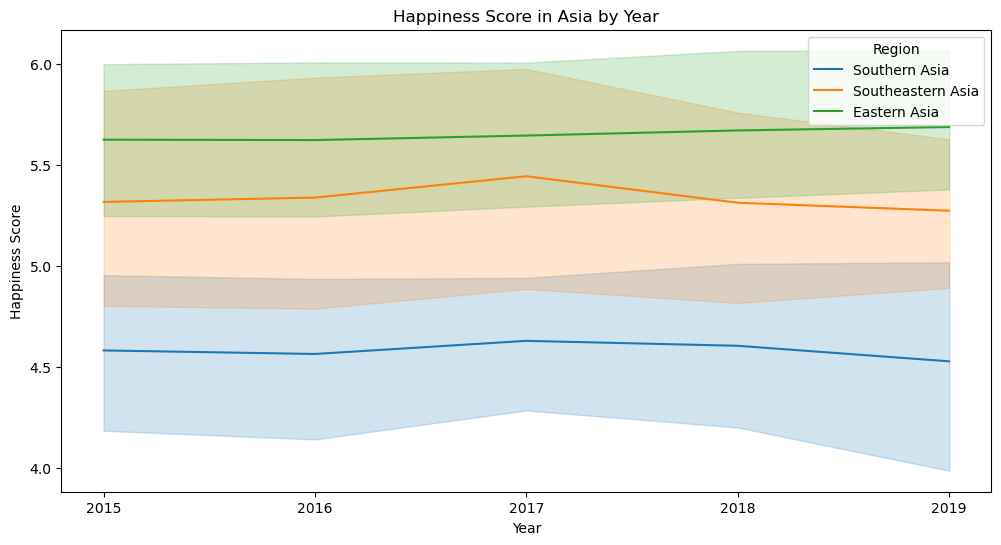

In [49]:
# Create a line plot of hapiness score per Capita by year
plt.figure(figsize=(12, 6))
sns.lineplot(data=asia_data, x='Year', y='Happiness Score', hue='Region')
# Set integer XTicks
plt.locator_params(axis='x', integer=True)

plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Happiness Score in Asia by Year')
plt.legend(title='Region')
plt.show()

#### 8. Trust by Region

C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\noora\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


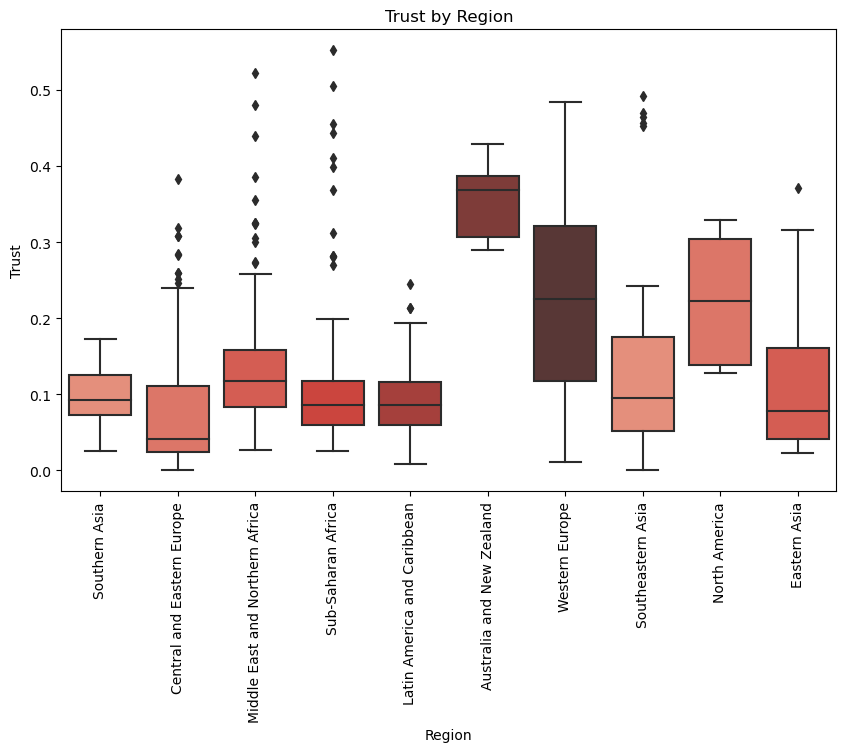

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Trust', data=data,palette=sns.color_palette("Reds_d", n_colors=7, desat=1))
plt.xlabel('Region')
plt.ylabel('Trust')
plt.title('Trust by Region')
plt.xticks(rotation=90)
plt.show()

#### We can notice that Western Europe in the Most stable region in term of trusting the government.

### PCA: Dimension reduction 

Number of Components that exmpalin 90% of the data is = 4


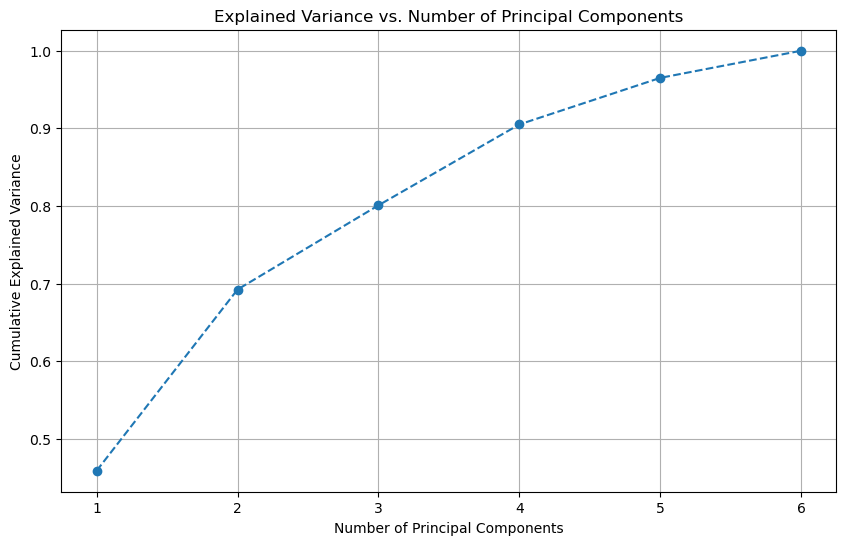

In [51]:
# Step 1: Standardize the data
numerical_columns = ['GDP per Capita', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity']
X = data[numerical_columns]

# Step 2: Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Step 3: Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Step 4: Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)

# Step 5: Choose the number of components
# we will choose the number of components based on the explained variance you want to retain
# Example: Retain 95% of the variance
n_components = len(cumulative_explained_variance[cumulative_explained_variance <= 0.95])
print('Number of Components that exmpalin 90% of the data is =',n_components)

In [52]:
# Rerun the PCA with the optimal number of components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_std)
X_pca1 = X_pca

In [53]:
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

,PC1,PC2,PC3,PC4
0,3.623418,1.269158,0.696403,1.120415
1,2.858993,1.581127,0.303835,1.077369
2,3.368023,-0.136347,0.452778,0.707523
3,3.450254,-0.659673,0.742706,1.077302
4,3.122987,0.684159,0.094492,1.084548


In [54]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
GDP per Capita,-0.509941,-0.246672,0.204922,0.291119
Family,-0.452884,-0.269269,-0.464332,-0.210286
Life Expectancy,-0.501899,-0.251890,0.109524,0.357312
Freedom,-0.408309,0.341491,-0.291755,-0.599798
Trust,-0.320869,0.492104,0.682054,-0.174898
Generosity,-0.115239,0.666645,-0.424369,0.594147


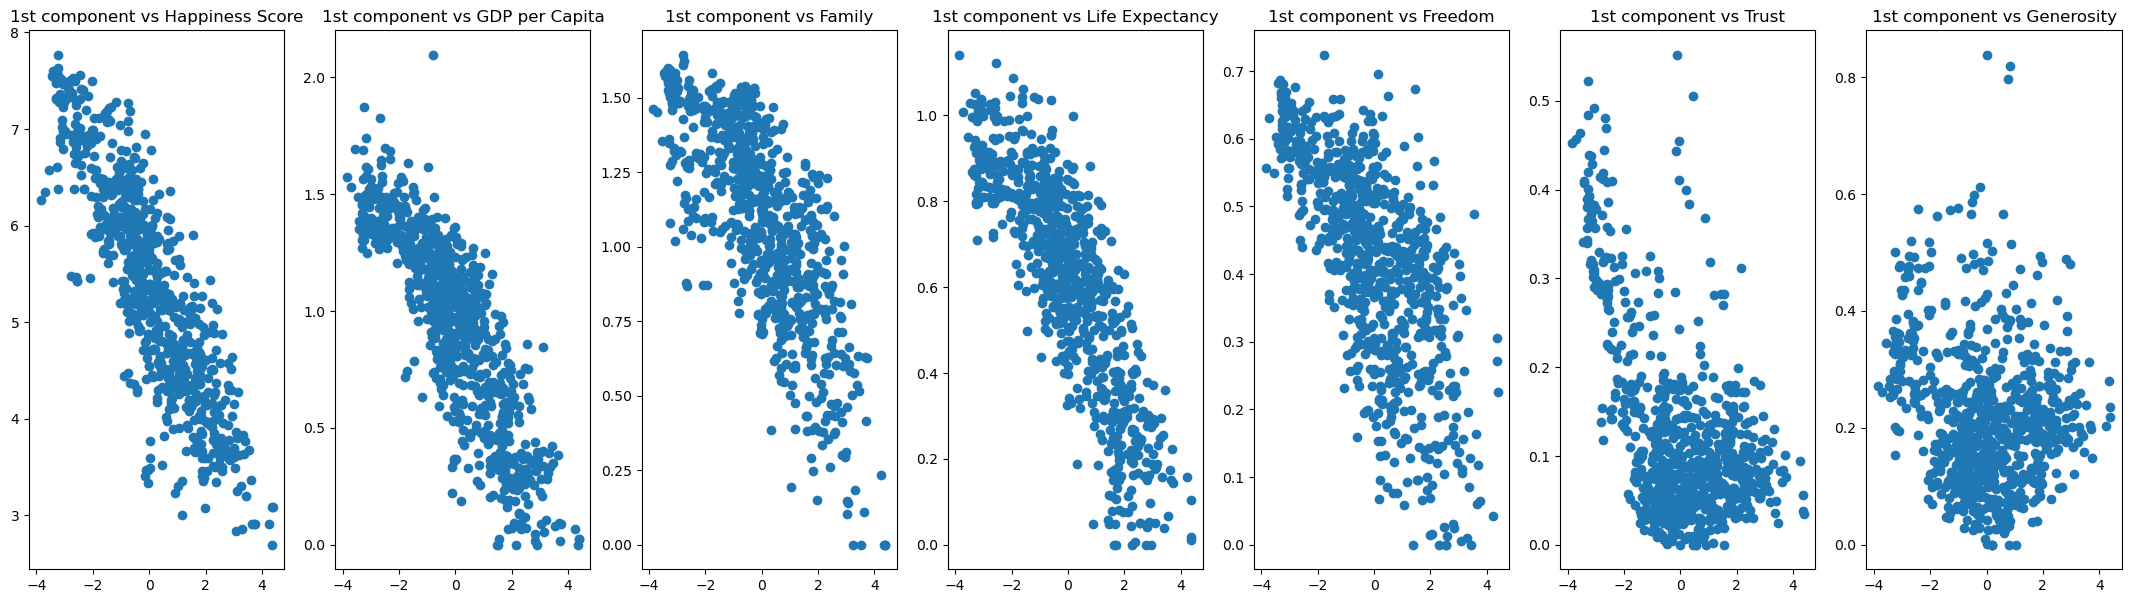

In [55]:
_, axes = plt.subplots(ncols=7, figsize=(27,7))
for i, (ax, col) in enumerate(zip(axes, data.columns[2:])):
    ax.scatter(X_pca1[:,0], data[col])
    ax.set_title(f'1st component vs {col}')

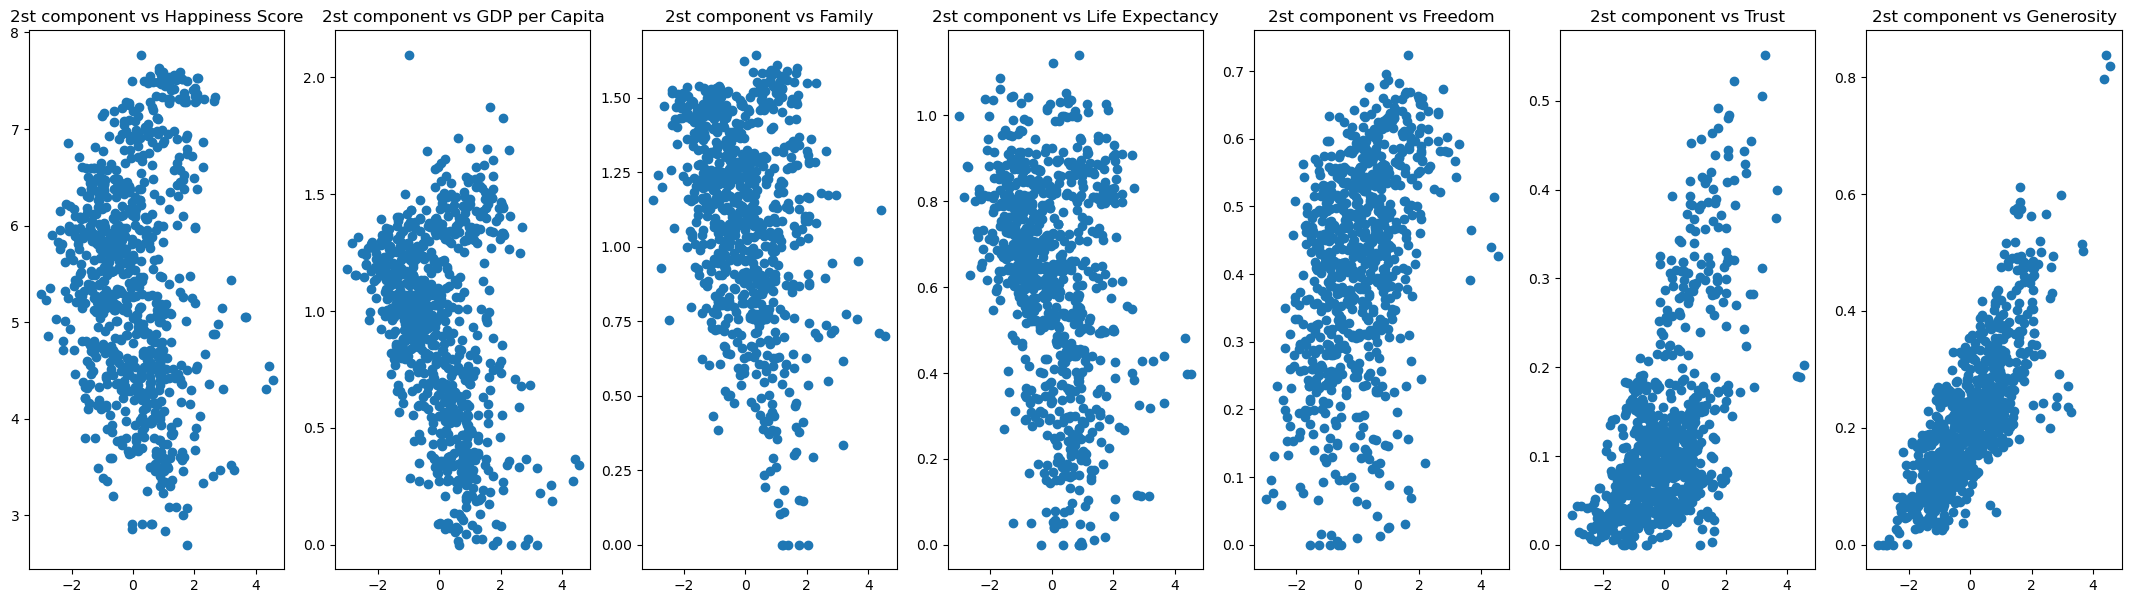

In [56]:
_, axes = plt.subplots(ncols=7, figsize=(27,7))
for i, (ax, col) in enumerate(zip(axes, data.columns[2:])):
    ax.scatter(X_pca1[:,1], data[col])
    ax.set_title(f'2st component vs {col}')

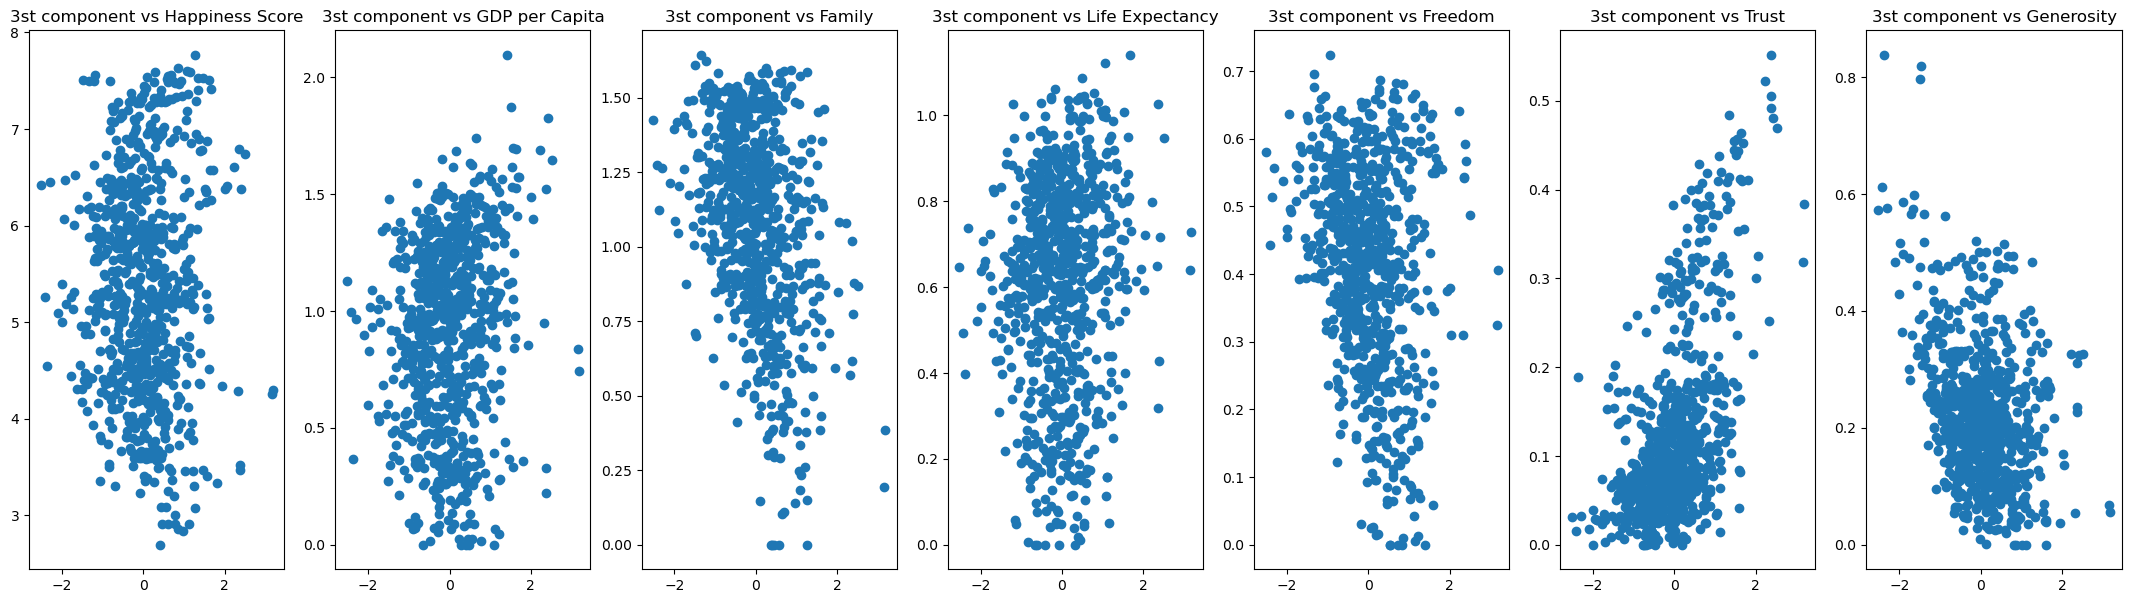

In [57]:
_, axes = plt.subplots(ncols=7, figsize=(27,7))
for i, (ax, col) in enumerate(zip(axes, data.columns[2:])):
    ax.scatter(X_pca1[:,2], data[col])
    ax.set_title(f'3st component vs {col}')

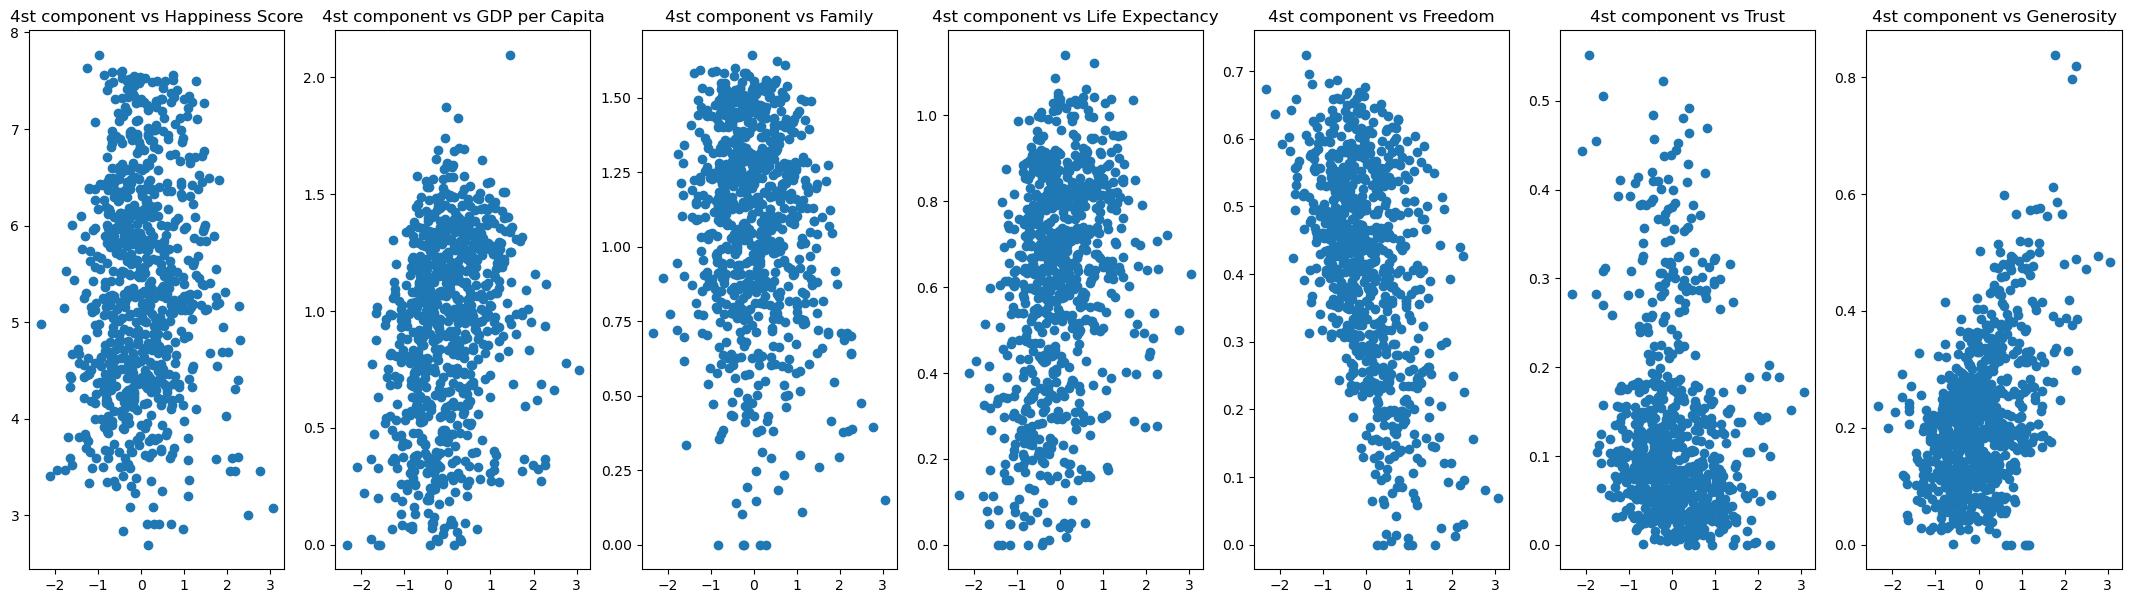

In [58]:
_, axes = plt.subplots(ncols=7, figsize=(27,7))
for i, (ax, col) in enumerate(zip(axes, data.columns[2:])):
    ax.scatter(X_pca1[:,3], data[col])
    ax.set_title(f'4st component vs {col}')

##### Evaluation of 4 components
After PCA downscaling to 4 components, we can found for example that:
1. The happiness score is mainly related to the first component. Except for Generosity and Trust, all the rest of the factors (4 factors) have a relatively large impact on the composition of the first principal component. They have a negative correlation with the first component, so can considere it as a measure of poverty for a country.
2. The second component is most strongly positive correlated with the Generosity and significantly positive correlated Trust.
3. The third component is most strongly positive correlated with the Trust.
3. The fourth component is most strongly negatively correlated with the Freedom.

#### PCA: Visualization ####
In order to facilitate to visualize data, we only use 2 components that
represent most the meanings of data, component 1 and component 2.

As we mentioned, the the first component is negatively correlated with the features related to the wealth of countries and the second component is most strongly positive correlated with the Generosity, so we call:

*   The first component: Poverty
*   The second component: Generosity




In [59]:
from sklearn.preprocessing import LabelEncoder
# Combine the principal components with other columns if needed
final_df = pd.concat([data[['Country', 'Region', 'Year']], X_pca], axis=1)

# Remove redundant data points (keeping only unique combinations of PC values)
final_df = final_df.drop_duplicates(subset=[f'PC{i+1}' for i in range(n_components)])

# Encode the 'Region' column using LabelEncoder
label_encoder = LabelEncoder()
final_df['Region_encoded'] = label_encoder.fit_transform(final_df['Region'])
final_df

# Remove duplicates based on the 'Country' column
final_df = final_df.drop_duplicates(subset=['Country'])
final_df

,Country,Region,Year,PC1,PC2,PC3,PC4,Region_encoded
0,Afghanistan,Southern Asia,2016,3.623418,1.269158,0.696403,1.120415,7
5,Albania,Central and Eastern Europe,2017,0.392367,-0.503245,0.044233,0.577586,1
10,Algeria,Middle East and Northern Africa,2016,0.722006,-0.976856,1.548459,0.271836,4
15,Angola,Sub-Saharan Africa,2015,2.474672,-0.731589,0.598104,0.217946,8
19,Argentina,Latin America and Caribbean,2018,-1.058696,-1.378555,-0.633154,-1.213703,3
...,...,...,...,...,...,...,...,...
757,Venezuela,Latin America and Caribbean,2017,0.255916,-2.117909,0.242078,0.297156,3
762,Vietnam,Southeastern Asia,2016,0.118546,0.752672,-0.120696,-0.281524,6
767,Yemen,Middle East and Northern Africa,2017,1.962805,-0.684799,0.167693,-0.384098,4
772,Zambia,Sub-Saharan Africa,2018,1.012640,0.578795,-0.738316,-0.967351,8


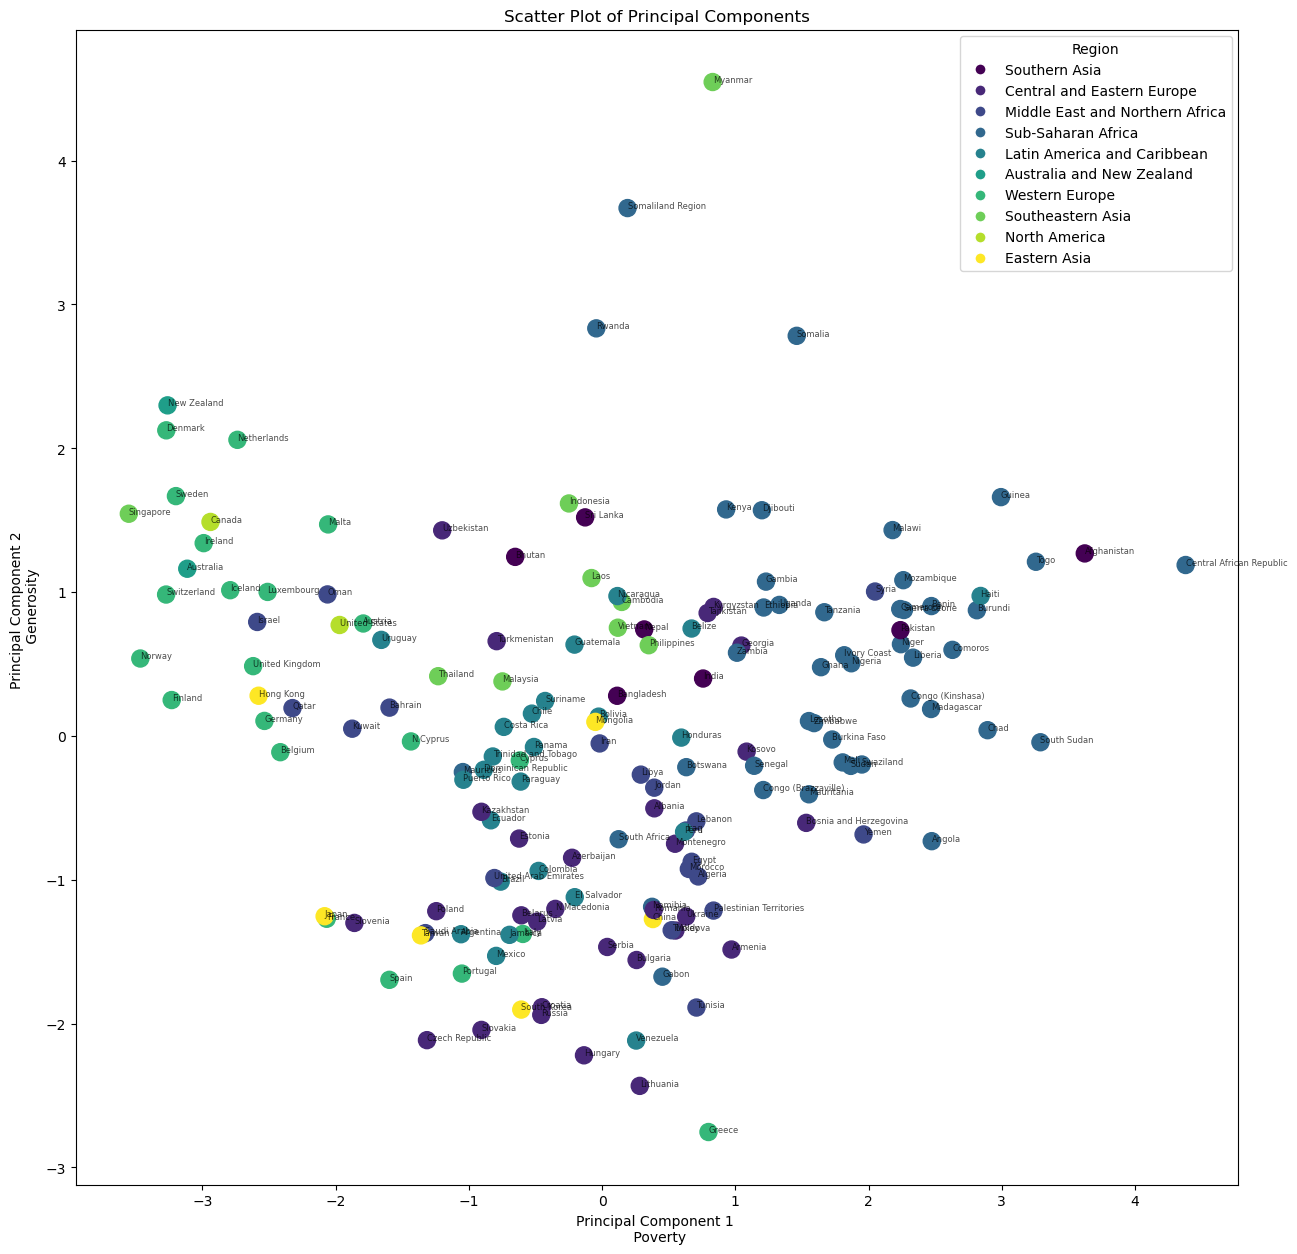

In [60]:
# Create a scatter plot with labels and region-based coloring
plt.figure(figsize=(15, 15))

# Assign a unique color to each region
region_colors = plt.cm.viridis(np.linspace(0, 1, len(final_df['Region'].unique())))

# Map each region to its corresponding color
region_color_mapping = {
    region: color
    for region, color in zip(final_df['Region'].unique(), region_colors)
}

# Use 'Region' to map to colors
colors = final_df['Region'].map(region_color_mapping)

# Scatter plot using PCA components for 'x' and 'y', and 'colors' for coloring
scatter = plt.scatter(
    final_df['PC1'],
    final_df['PC2'],
    c=colors,
    cmap='viridis',
    s=150
)
plt.xlabel('Principal Component 1 \n Poverty')
plt.ylabel('Principal Component 2 \n Generosity')
plt.title('Scatter Plot of Principal Components')

# Add country labels to data points
for i, txt in enumerate(final_df['Country']):
    plt.annotate(txt, (final_df['PC1'].iloc[i], final_df['PC2'].iloc[i]), fontsize=6, alpha=0.7)

# Create a legend based on the 'Region' column
regions = final_df['Region'].unique()
scatter_legend = [
    plt.Line2D([0], [0], marker='o', color='w', label=region, markersize=8, markerfacecolor=region_color_mapping[region])
    for region in regions
]
plt.legend(handles=scatter_legend, title='Region', loc='upper right')

plt.show()

##### We can visually distinguish 3 clusters: 
* Countries that are rich and generous are frequently located in North America and Western Europe;
* Countries that are poor and generous are frequently located in Sub-Saharan Africa;
* And the rest of the countries that don't fit on the previous two groups are less generous.



#### TSNE Method
Now we will try the TSNE Technique (t-distributed stochastic neighbor embedding) which is a dimensionality reduction technique used for visualizing and clustering high-dimensional data in lower dimensions. It is distinct from PCA (Principal Component Analysis), as it is a non-linear technique and focuses on preserving the relationships and similarities between data points rather than capturing the principal components of variance.

In [61]:
from sklearn.manifold import TSNE
X_atsne=X_std
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_atsne)


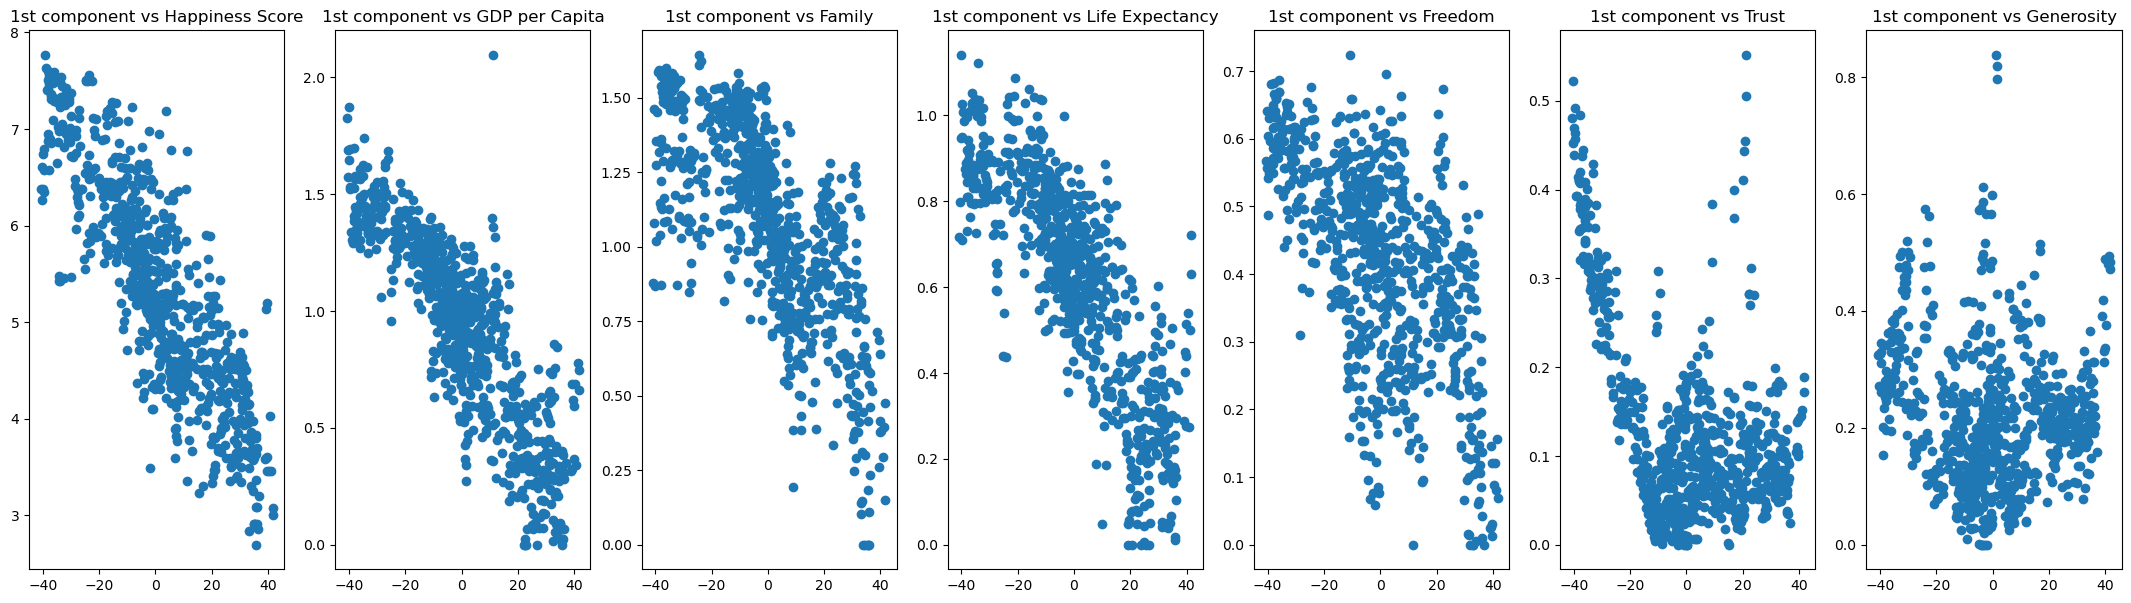

In [62]:
_, axes = plt.subplots(ncols=7, figsize=(27,7))
for i, (ax, col) in enumerate(zip(axes, data.columns[2:])):
    ax.scatter(X_tsne[:,0], data[col])
    ax.set_title(f'1st component vs {col}')

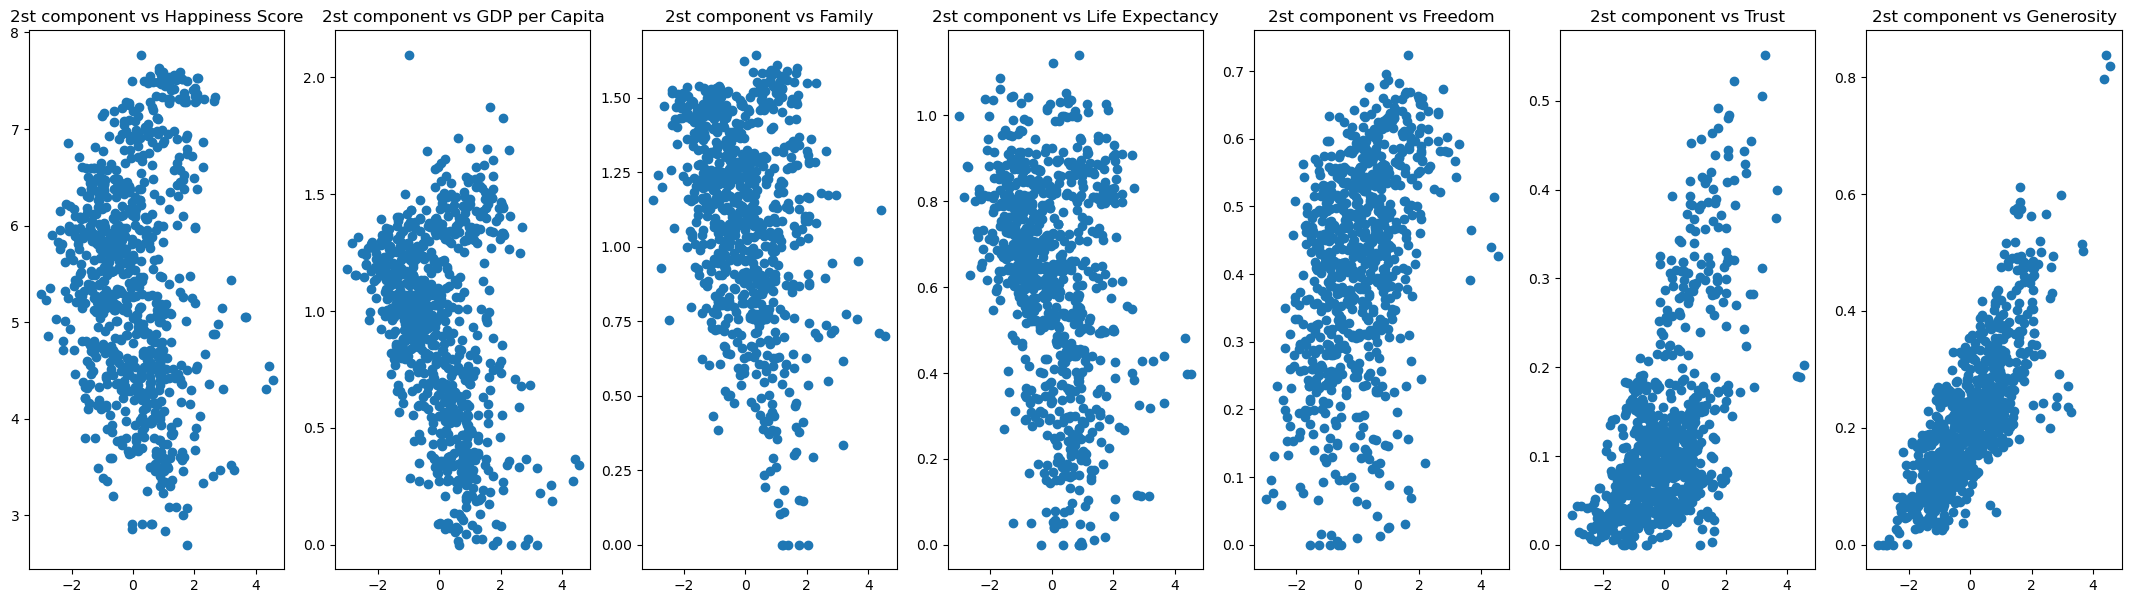

In [63]:
_, axes = plt.subplots(ncols=7, figsize=(27,7))
for i, (ax, col) in enumerate(zip(axes, data.columns[2:])):
    ax.scatter(X_pca1[:,1], data[col])
    ax.set_title(f'2st component vs {col}')

After TSNE downscaling to 2 components, we find that the happiness score is mainly related to its first component.

#### Factor Analysis ###
Factor Analysis seeks to identify latent factors that explain observed patterns in data, assuming linear relationships and distinguishing between common and unique factors.


In [64]:
from sklearn.decomposition import FactorAnalysis

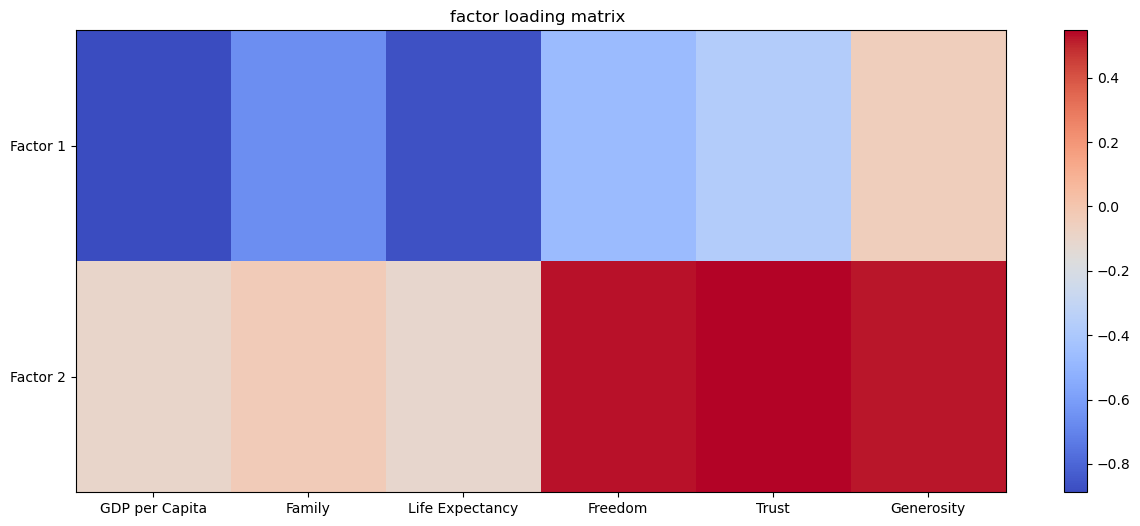

In [65]:
# FactorAnalysis
n_factors = 2
fa = FactorAnalysis(n_components=n_factors)
fa.fit(X_std)
# get factor loading matrix
loadings = fa.components_

# print("factor loading matrix:")
# print(loadings)

# print factor loading matrix
plt.figure(figsize=(15, 6))
plt.xticks(np.arange(len(numerical_columns)), numerical_columns)
plt.yticks(np.arange(n_factors), ['Factor 1', 'Factor 2'])
plt.imshow(loadings, cmap='coolwarm', aspect='auto', interpolation='none')
plt.colorbar()
plt.title('factor loading matrix ')
plt.show()



From FactorAnalysis we can easy notice that the first factor is strongly correlated negatively to the variables: 'GDP per Capita', 'Family', 'Life Expectancy', which is a a proof for all the analysis of PCA and TSNE.

### Clustering
Clustering refers to the process of grouping similar data points or objects into clusters or categories based on their inherent similarities or patterns in the data.
In our case, we will be grouping the countries using their happiness-related factors to group countries that exhibit similar patterns of happiness.
We will use 3 methods of clustering:
1. K-Means
2. Gaussian Mixture
3. Hierarchical
4. Mean Shift

##### Note:
*   In this section, we will do the clustering by using the 6 original feature: GDP per Capita, Family, Life Expectancy) Freedom, Generosity, Trust beacause the size of dataset is not too big. So clustering based on original data will not affect to the efficiency but give better result when using PCA data
*   Howerver, the visualization of clustering result will be presented in according to the two first component of PCA (Poverty and Generosity)



In [66]:
X_std.shape

(782, 6)

#### K-Means Clustering

##### Plot the Elbow Method to find the optimal K
The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In [67]:
# Testing several values of K to determine the number of clusters (K) using the Elbow Method
inertia_EM = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_std)
    inertia_EM.append(kmeans.inertia_)

C:\Users\noora\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\noora\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\noora\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\noora\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

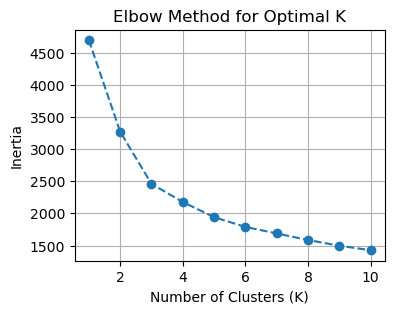

In [68]:
plt.figure(figsize=(4, 3))
plt.plot(range(1, 11), inertia_EM, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)

##### Metrics
*   Calinski-Harabas (HC): Also known as the Variance Ratio Criterion, this index measures the ratio of between-cluster variance to within-cluster variance. Higher value of CH index means the clusters are dense and well separated, although there is no “acceptable” cut-off value. We need to choose that solution which gives a peak or at least an abrupt elbow on the line plot of CH indices.
*   Silhouette: Silhouette Score is a metric to evaluate the performance of clustering algorithm. It uses compactness of individual clusters(intra cluster distance) and separation amongst clusters (inter cluster distance) to measure an overall representative score of how well our clustering algorithm has performed. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters



In [69]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

C:\Users\noora\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\noora\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\noora\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\noora\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

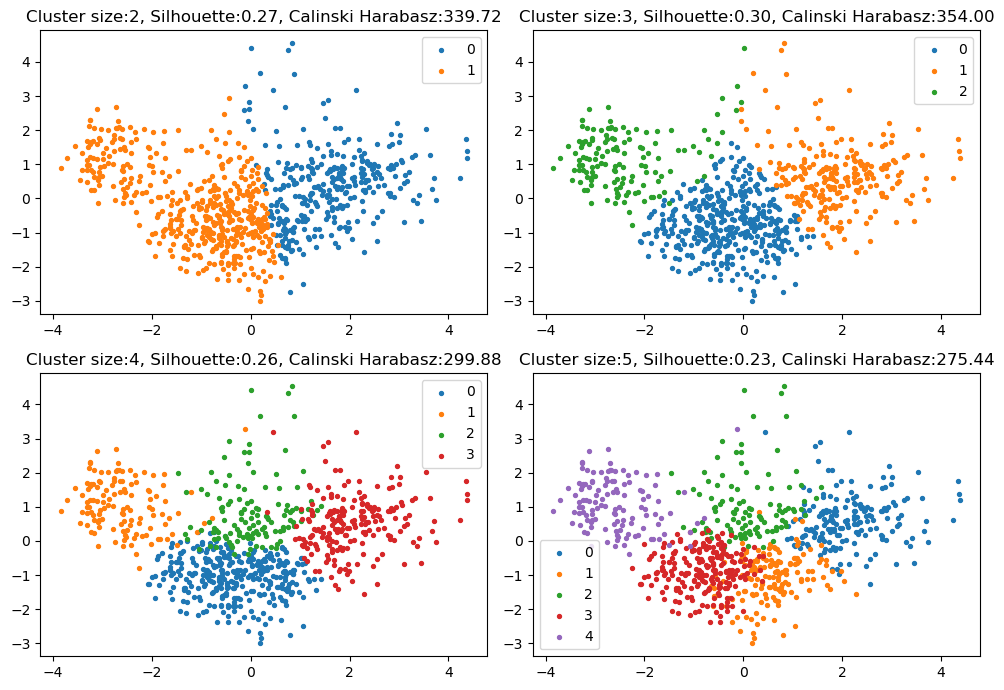

In [70]:
# Show 4 numbers of cluster nearby 3:
f = plt.figure(figsize=(10, 7))
for i in range(2,6):

    kmeans = KMeans(n_clusters=i,n_init=40,init='random').fit(X_std)
    labels = kmeans.labels_
    df = pd.DataFrame({'x':X_pca["PC1"], 'y':X_pca["PC2"], 'label':labels})
    groups = df.groupby('label')
    f.add_subplot(2, 2, i-1)
    sil = silhouette_score(X_std , labels)
    hc = calinski_harabasz_score(X_std, kmeans.labels_)
    for name, group in groups:
        plt.scatter(group.x, group.y, label=name, s=8)
        plt.title("Cluster size:" + str(i)+", Silhouette:%.2f" % sil+", Calinski Harabasz:%.2f" % hc)
        plt.legend()

plt.tight_layout()
plt.show()

#### Gaussian Mixture
Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

In the following figure, when using GMM, we still acquired the best result with clusters number of 3.

C:\Users\noora\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\noora\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\noora\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\noora\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

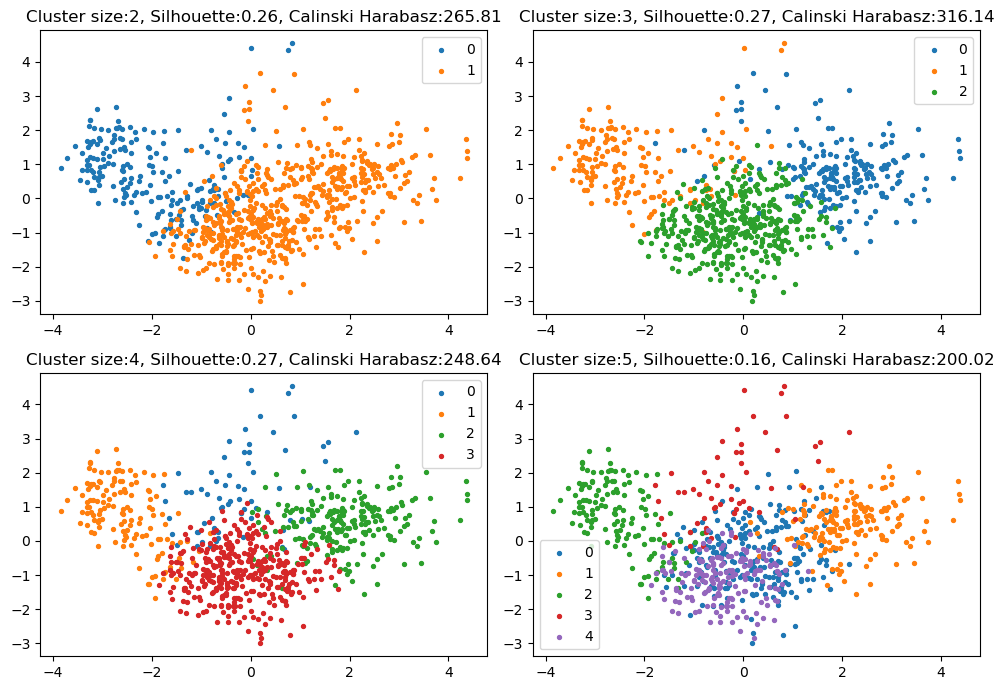

In [71]:
# Show 4 numbers of cluster nearby 3:
from sklearn.mixture import GaussianMixture
f = plt.figure(figsize=(10, 7))
for i in range(2, 6):
    gm = GaussianMixture(n_components=i).fit(X_std)
    labels = gm.predict(X_std)
    df = pd.DataFrame({'x':X_pca["PC1"], 'y':X_pca["PC2"], 'label':labels})
    groups = df.groupby('label')
    f.add_subplot(2, 2, i-1)
    sil = silhouette_score(X_std , labels)
    hc = calinski_harabasz_score(X_std, labels)
    for name, group in groups:
        plt.scatter(group.x, group.y, label=name, s=8)
        plt.title("Cluster size:" + str(i)+", Silhouette:%.2f" % sil+", Calinski Harabasz:%.2f" % hc)
        plt.legend()

plt.tight_layout()
plt.show()

#### Hierarchical clustering
In the next methods, we will only use data of 2019 because of the 2 following reasons:
*   Reduce calculation.
*   We can see in the results of K-Means and Gaussian Mixture Model, the silhouette scores are high, so that means the clustering has the low seperation level. Therefore, the data combined from other years could make some noise in the result.



In [72]:
# Create data 2019
# Step 1: Take data from the year of 2019
data_2019 = data[data["Year"] == 2019].drop(columns=["Year"], axis=1).reset_index(drop=True)
numerical_columns = ['GDP per Capita', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity']
X_2019 = data_2019[numerical_columns]

# Step 2: Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_std_2019 = scaler.fit_transform(X_2019)

In [73]:
# Create PCA for data 2019
# Rerun the PCA with the optimal number of components
pca = PCA(n_components=4)
X_pca_2019 = pca.fit_transform(X_std_2019)
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca_2019 = pd.DataFrame(X_pca_2019, columns=component_names)
X_pca_2019.head()

,PC1,PC2,PC3,PC4
0,3.957017,-0.505351,-0.467332,1.346695
1,0.513322,-0.399945,0.293158,0.140725
2,0.705632,-1.621536,-1.010728,1.389360
3,-0.885935,-1.397278,0.040323,-0.838413
4,0.627450,-1.103652,-0.399213,0.240550


In [74]:
# Libraries for Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score

In [75]:
#Show the cophenet score and silhouette score for each method
methods=['single','complete','average', 'weighted', 'centroid', 'median', 'ward']
for method in methods:
    Z = linkage(X_std_2019, method)
    c, coph_dists = cophenet(Z, pdist(X_std_2019))
    Best_sil = 0
    clstr = 0
    # Find the best clusters number for each method by using silhouette score (clusters > 2)
    for i in range(3,7):
        labels_HC = fcluster(Z, i, criterion="maxclust")
        if len(np.unique(labels_HC)) > 1:
            sil = silhouette_score(X_std_2019 , labels_HC)
            if sil > Best_sil:
                Best_sil = sil
                clstr = i
    print(method,': (cophenet, ',c, '), (silhouette, ', Best_sil, '), (Clusters, ', clstr, ')')

single : (cophenet,  0.5157045618593029 ), (silhouette,  0.2697937202145928 ), (Clusters,  3 )
complete : (cophenet,  0.6302313729492961 ), (silhouette,  0.24919259352775114 ), (Clusters,  6 )
average : (cophenet,  0.7454062378691642 ), (silhouette,  0.29221911794796984 ), (Clusters,  3 )
weighted : (cophenet,  0.6041177363687309 ), (silhouette,  0.2753083319623475 ), (Clusters,  3 )
centroid : (cophenet,  0.7445230870075467 ), (silhouette,  0.29221911794796984 ), (Clusters,  3 )
median : (cophenet,  0.6334076322119381 ), (silhouette,  0.2932094323194557 ), (Clusters,  3 )
ward : (cophenet,  0.6356005501875278 ), (silhouette,  0.310382603441378 ), (Clusters,  3 )


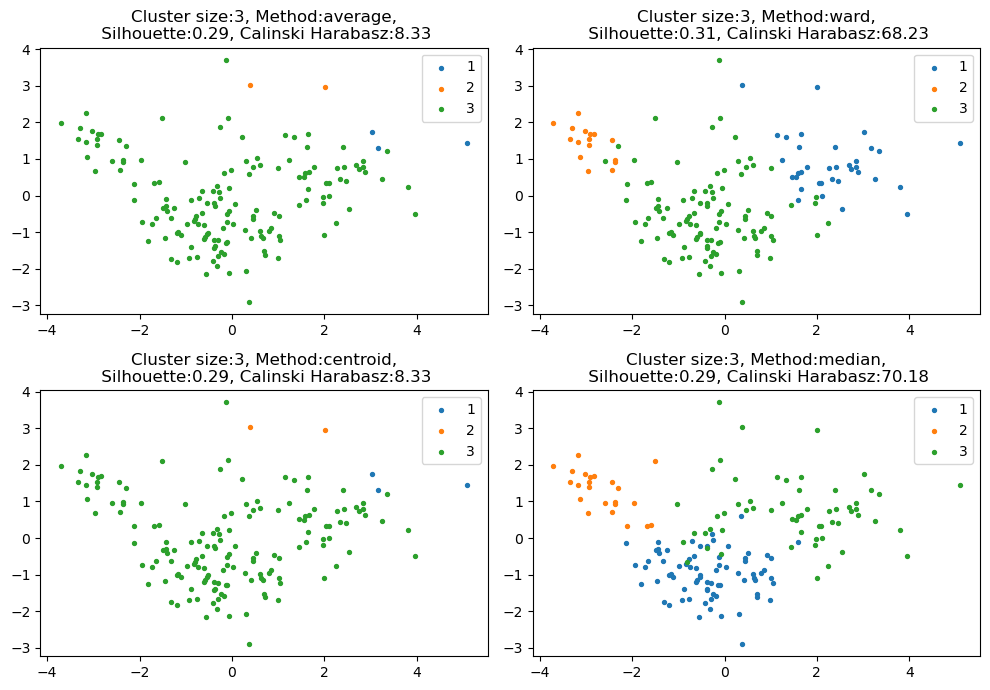

In [76]:
# Show 4 methods with the best cophenet scores
Best_HC = {"average": 3, "ward" : 3, "centroid": 3, "median": 3}
f = plt.figure(figsize=(10, 7))
for i in range(4):
    Z = linkage(X_std_2019, list(Best_HC.keys())[i])
    labels = fcluster(Z,  list(Best_HC.values())[i], criterion="maxclust")
    df = pd.DataFrame({'x':X_pca_2019["PC1"], 'y':X_pca_2019["PC2"], 'label':labels})
    groups = df.groupby('label')
    f.add_subplot(2, 2, i+1)
    sil = silhouette_score(X_std_2019 , labels)
    hc = calinski_harabasz_score(X_std_2019, labels)
    for name, group in groups:
        plt.scatter(group.x, group.y, label=name, s=8)
        plt.title("Cluster size:" +
                  str(list(Best_HC.values())[i]) +", Method:%s" % list(Best_HC.keys())[i]+",\n Silhouette:%.2f" % sil+", Calinski Harabasz:%.2f" % hc)
        plt.legend()

plt.tight_layout()
plt.show()

##### Comments: ####
In the above figure, we see the 4 best method with their best clusters number.

The centroid and average methods have the good cophenet score and good silhouette score (comparing to others), but Calinski Harabasz score show the contrast. Otherwise, median and ward seem to be better.

In the code, we only consider clusters numbers superior than 2 because the countries seem to be only divide into high happiness score group and low happiness score group if the cluster number is equal 2.

#### Mean shift ####
Mean Shift is a clustering algorithm that doesn't require specifying the number of clusters in advance. It automatically discovers clusters in a dataset based on data density.

In [77]:
# Find the best parameter quantile for function estimate_bandwidth() by using silhouette score
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
n_clusters_MS = 1
sil_MS = -1.0
quantile_MS = 0
for i in range(0,101):
    try:
        bandwidth = estimate_bandwidth(X_std_2019, quantile=i*0.01)
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        ms.fit(X_std_2019)
        labels = ms.labels_
        labels_unique = np.unique(labels)
        n_clusters_ = len(labels_unique)
        sil = silhouette_score(X_std_2019 , labels)
    except:
        continue
    if sil > sil_MS:
        sil_MS = sil
        n_clusters_MS = n_clusters_
        quantile_MS = i*0.01

print("The best quantile: %f", quantile_MS)
print("Silhouette score : %f" % sil_MS)
print("Number of estimated clusters : %d" % n_clusters_MS)

The best quantile: %f 0.17
Silhouette score : 0.333526
Number of estimated clusters : 4


In [78]:
# Recalculate with the best quantile
bandwidth = estimate_bandwidth(X_std_2019, quantile = quantile_MS)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_std_2019)
labels_MS = ms.labels_
labels_unique_MS = np.unique(labels_MS)

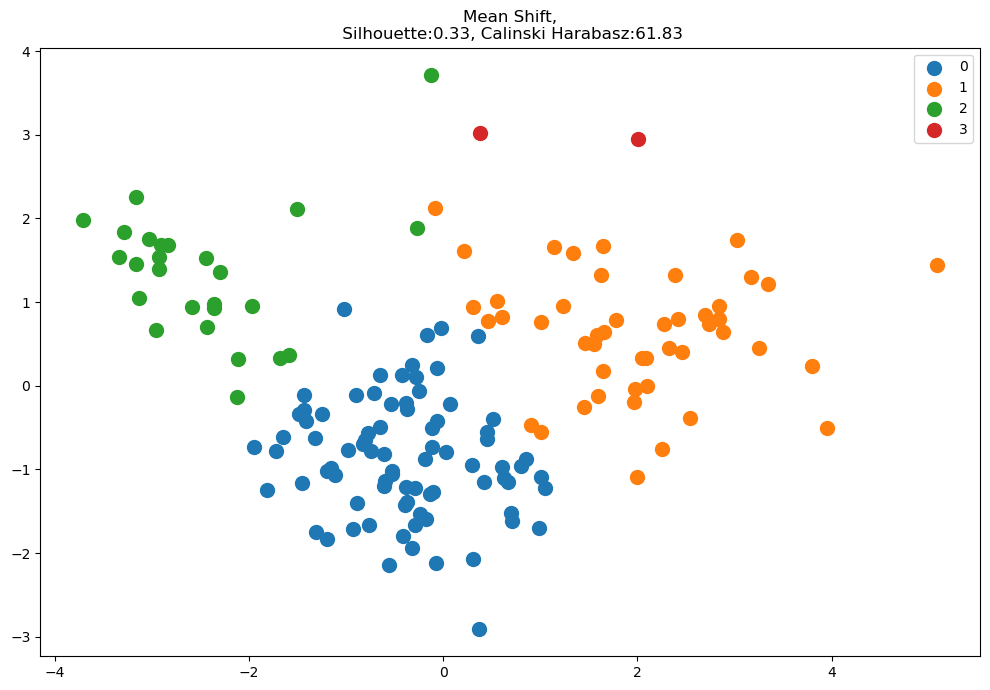

In [79]:
# Show the clusters by mean shift method
f = plt.figure(figsize=(10, 7))
bandwidth = estimate_bandwidth(X_std_2019, quantile = quantile_MS)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_std_2019)
labels_MS = ms.labels_
df = pd.DataFrame({'x':X_pca_2019["PC1"], 'y':X_pca_2019["PC2"], 'label':labels_MS})
groups = df.groupby('label')
sil = silhouette_score(X_std_2019 , labels_MS)
hc = calinski_harabasz_score(X_std_2019, labels_MS)
for name, group in groups:
    plt.scatter(group.x, group.y, label=name, s=100)
    plt.title("Mean Shift" +",\n Silhouette:%.2f" % sil+", Calinski Harabasz:%.2f" % hc)
    plt.legend()

plt.tight_layout()
plt.show()

##### Comments:
The mean shift method gave us the clusters number when silhouette score is 4. However, when we visualized in the figure, the cluster 4 seem to be the outliers. So we still have the same result with other methods.

#### Clustering Conclusion: ####


*   We acquired the clusters number is 3 with all 4 methods althought the seperation level of clusters is not too high (it's better to have a silhouette score  > 0.6).
*   The number of clusters is similar with our expection when we did PCA. Generally, we have 3 clusters:
 * Countries that are rich and generous are frequently located in North America and Western Europe;
 * Countries that are poor and generous are frequently located in Sub-Saharan Africa;
 * And the rest of the countries that don't fit on the previous two groups are less generous.
